In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

import scipy
import scipy.cluster.hierarchy as sch
import collections

sns.set_style('whitegrid')

# Problem definition

Cluster countries by happiness scored according to economic production, social support, etc.

https://www.kaggle.com/unsdsn/world-happiness

http://worldhappiness.report/ed/2017/

# Load the data

In [2]:
df = pd.read_csv('data/wh_2017.csv')
print(df.columns)
df.head()

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


# Feature Engineering 

In [3]:
# select the columns
X_columns = ['Happiness.Score', 'Economy..GDP.per.Capita.']

# normalize the data
for col in X_columns:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

# Model Training

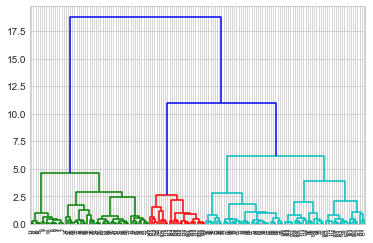

{1, 2, 3}
Counter({3: 74, 1: 55, 2: 26})


In [4]:
k = 3
color_threshold = 8.
d = sch.distance.pdist(df[X_columns])
Z= sch.linkage(d, method = 'ward') # minimize within cluster variation
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()

print(set(T))
print(collections.Counter(T))

df_results = df.copy()
df_results['cluster'] = T
df['cluster'] = T

In [5]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['Country'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['Country'])))

1 55
['Argentina', 'Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Hong Kong S.A.R., China', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Netherlands', 'New Zealand', 'North Cyprus', 'Norway', 'Panama', 'Poland', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan Province of China', 'Thailand', 'Trinidad and Tobago', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']
2 26
['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad', 'Congo (Kinshasa)', 'Ethiopia', 'Guinea', 'Haiti', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mozambique', 'Myanmar', 'Niger', 'Rwanda', 'Sierra Leone', 'Somalia', 'South Sudan', 'Tanzania', 

In [6]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,1,2,3
Happiness.Rank,30.38,136.50,92.84
Happiness.Score,1.04,-1.33,-0.31
Whisker.high,6.61,3.97,5.11
Whisker.low,6.45,3.74,4.90
Economy..GDP.per.Capita.,0.99,-1.61,-0.17
Family,1.41,0.83,1.15
Health..Life.Expectancy.,0.76,0.21,0.52
Freedom,0.50,0.33,0.37
Generosity,0.27,0.28,0.21
Trust..Government.Corruption.,0.18,0.11,0.09


Happiness.Score


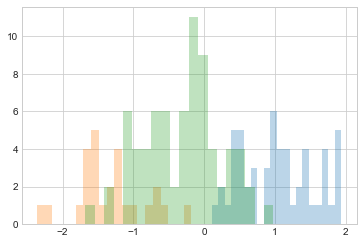

Economy..GDP.per.Capita.


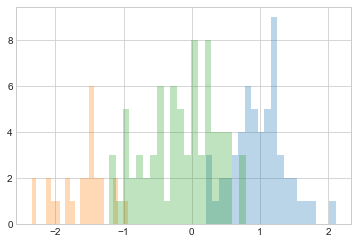

In [7]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(T):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    #plt.legend()
    plt.show()

3
Happiness.Score


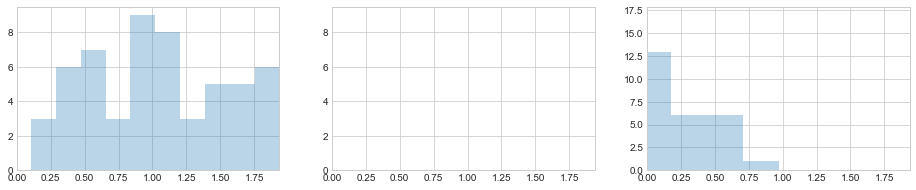

Economy..GDP.per.Capita.


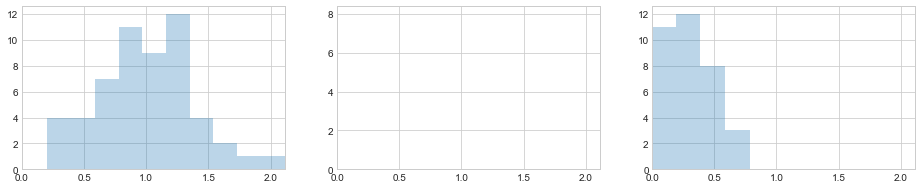

In [8]:
# Analyze the results
n_clusters = len(set(T))
print(n_clusters)
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(T)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=10)
        i += 1
    plt.show()

Happiness.Score


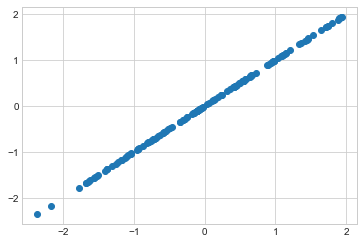

Economy..GDP.per.Capita.


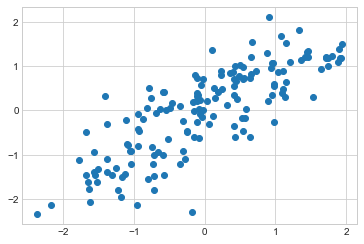

Family


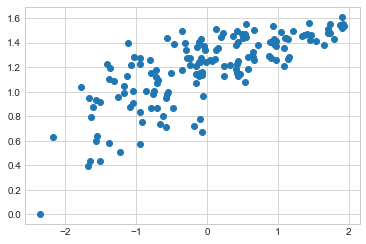

Health..Life.Expectancy.


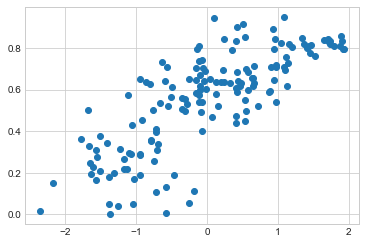

Freedom


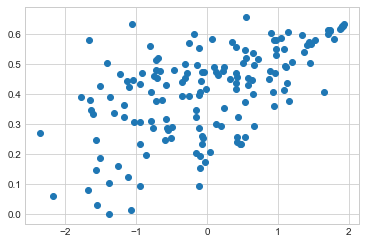

Generosity


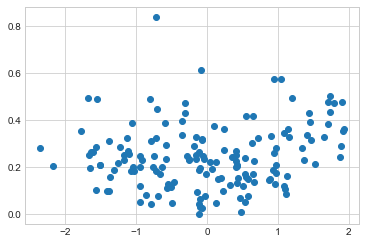

Trust..Government.Corruption.


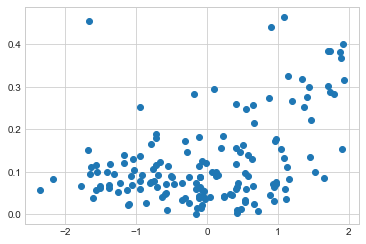

Dystopia.Residual


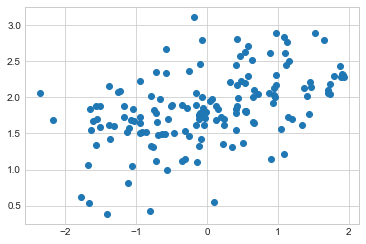

In [9]:
# Analyze the correlation with Happiness Score
for c in ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']:
    print(c)
    plt.plot(df_results['Happiness.Score'], df_results[c], 'o')
    plt.show()

# Model Evaluation

In [10]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(T)):
    centroids.append(df[df['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(T)):
    df_filter = df[df['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(T)):
    df_filter = df[df['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 1.0539147412652392
Intra Cluster distance 0.4277468993543627
Inertia 73.42901962018615


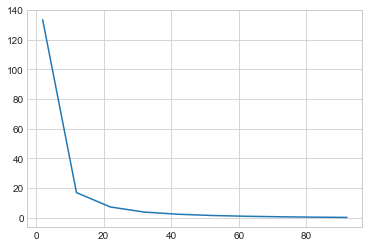

In [11]:
inertia = []
number_k = []
for k in range(2,100,10):
    d = sch.distance.pdist(df[X_columns])
    Z= sch.linkage(d, method = 'ward')
    T = sch.fcluster(Z, k, 'maxclust')
    df['cluster'] = T

    # Inertia
    distances = []
    for cluster in sorted(set(T)):
        df_filter = df[df['cluster']==cluster]
        centroid = df_filter[X_columns].mean().values
        for _, v in df_filter[X_columns].iterrows():
            distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
    inertia.append(np.sum(distances))
    number_k.append(k)
plt.plot(number_k, inertia)
plt.show()